# BY: NIDHI LAKHANI

## TASK 2: Prediction using Unsupervised Machine Learning (GRIP - The Sparks Foundation)

To: Predict the optimum number of clusters from the given ‘Iris’ dataset, and represent it visually. 

LIBRARIES USED: *Pandas*, *Numpy*, *matplotlib*, *scikit learn* and *seaborn*

In [1]:
# Importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('Import successful')

Import successful


#### Reading Data

In [17]:
iris_df = pd.read_csv('Iris.csv')

In [18]:
iris_df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [20]:
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [21]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Visualizing Iris data set using seaborn

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

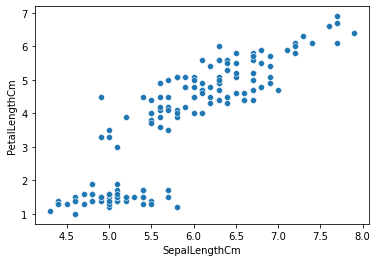

In [22]:
sns.scatterplot(x=iris_df['SepalLengthCm'],y=iris_df['PetalLengthCm'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalWidthCm'>

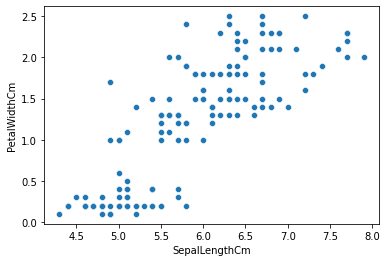

In [23]:
sns.scatterplot(x=iris_df['SepalLengthCm'], y=iris_df['PetalWidthCm'])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

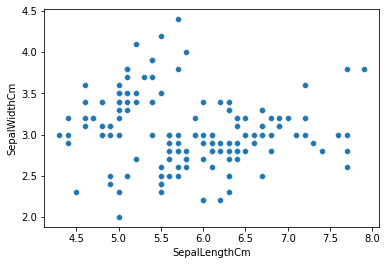

In [24]:
sns.scatterplot(x=iris_df['SepalLengthCm'], y=iris_df['SepalWidthCm'])

In [25]:
iris_df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

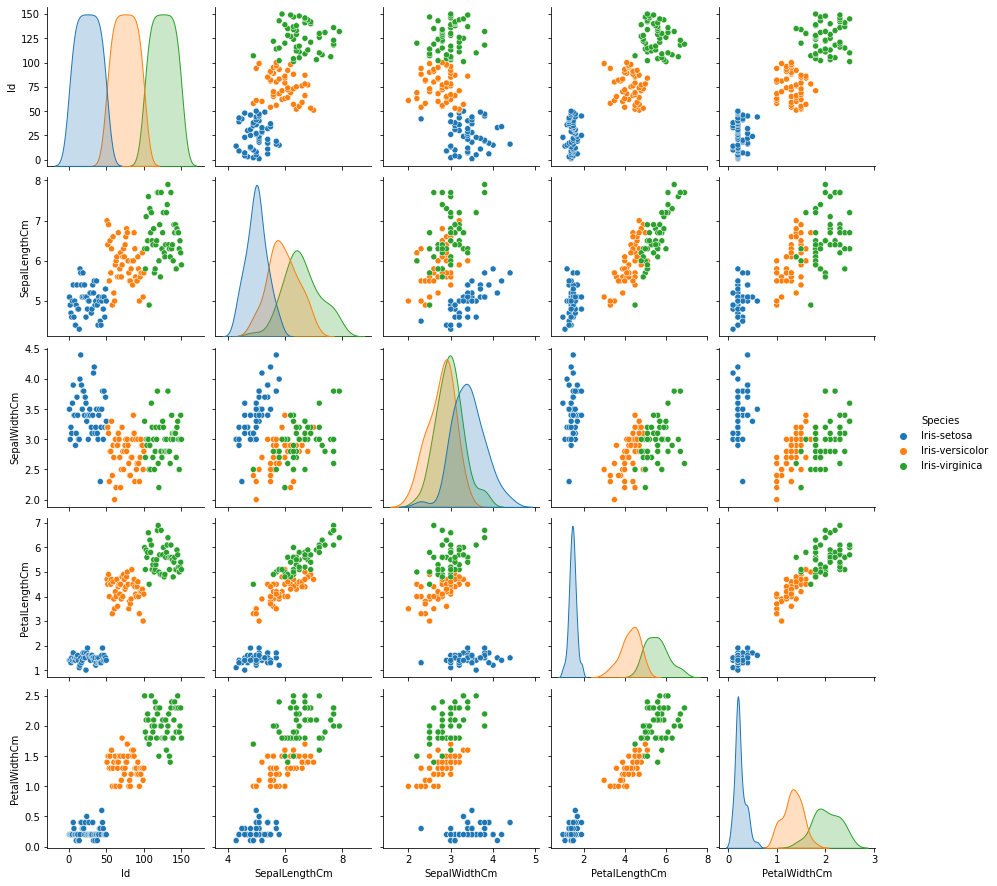

In [27]:
sns.pairplot(iris_df,hue ='Species')

<AxesSubplot:>

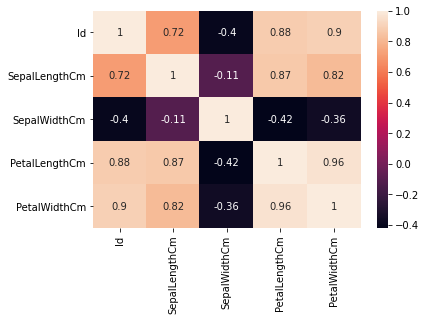

In [29]:
sns.heatmap(iris_df.corr(), annot=True)

#### Import KMeans Cluster from scikit learn

In [31]:
from sklearn.cluster import KMeans
print('Imported KMeans')

Imported KMeans


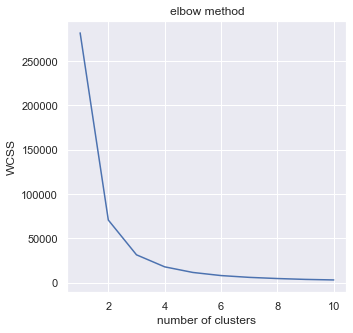

In [34]:
# Finding the number of clusters for kmeans classification

X = iris_df.iloc[: , [0,1,2,3]].values
wcss = []
for i in range(1 , 11):
    kmeans = KMeans(n_clusters = i , init= 'k-means++' ,
                   max_iter=300,
                   n_init=10,
                   random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
    
# plot the results of the line graph
plt.plot(range(1,11) , wcss)
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()
sns.set(rc={'figure.figsize' : (5,5)})

**The optimum number of clusters is where the elbow occurs. Hence, in the above graph, the optimum number of clusters is 3.This is the point where the 'within cluster sum of squares (WCSS)' doesn't decrease significantly with every iteration.**

#### Applying kmeans to the dataset - Creating the kmeans classifer

In [35]:
kmeans = KMeans(n_clusters=3 , init="k-means++",
               max_iter=300,
               n_init=10,
               random_state=0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Visualising the clusters

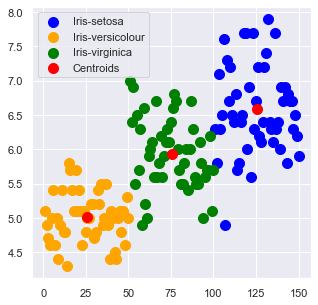

In [36]:
# On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend()

sns.set(rc={'figure.figsize':(15,15)})

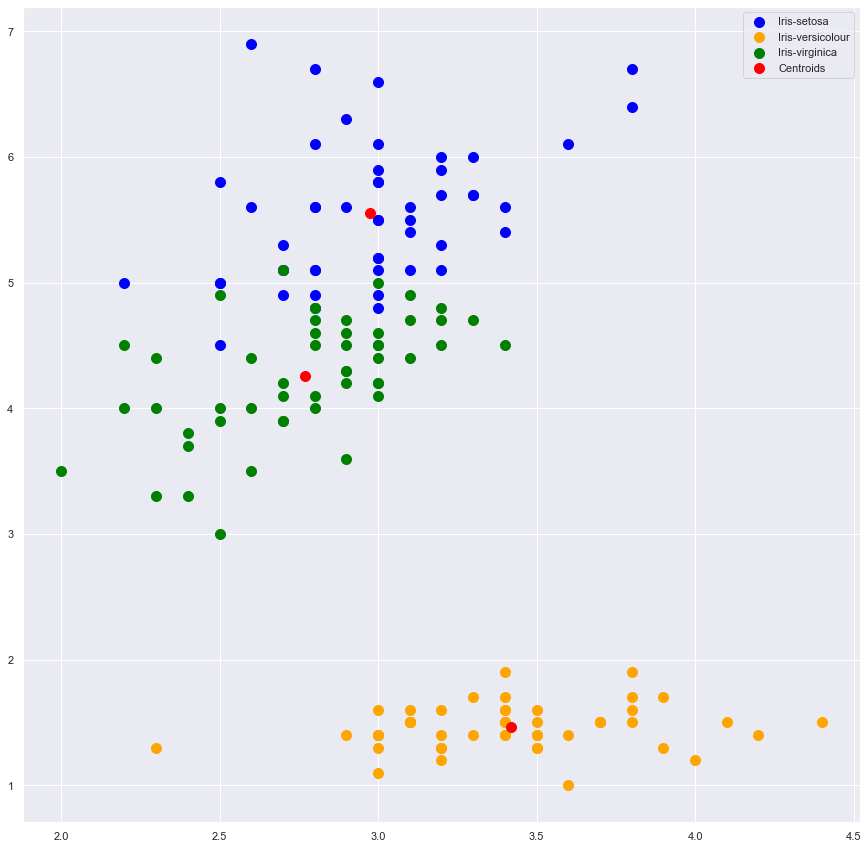

In [37]:
# On the third and fourth columns
plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 3], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 3], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend()

sns.set(rc={'figure.figsize':(5,5)})

### THANK YOU!